In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
# Creating dataset manually

data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,2,3,5,6,7,8,4,9,10,3,6,7],
    "Sleep_Hours": [5,6,7,6,7,8,6,7,5,6,7,8,6,7,6,7,8,5,7,6],
    "Attendance": [60,65,70,75,80,85,90,95,65,70,78,88,92,96,74,98,99,68,84,91],
    "Exam_Score": [40,45,50,55,65,70,75,85,48,52,68,72,78,88,60,90,95,54,73,80]
}

df = pd.DataFrame(data)

df


,Study_Hours,Sleep_Hours,Attendance,Exam_Score
0,1,5,60,40
1,2,6,65,45
2,3,7,70,50
3,4,6,75,55
4,5,7,80,65
5,6,8,85,70
6,7,6,90,75
7,8,7,95,85
8,2,5,65,48
9,3,6,70,52


In [5]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   Study_Hours  Sleep_Hours  Attendance  Exam_Score
0            1            5          60          40
1            2            6          65          45
2            3            7          70          50
3            4            6          75          55
4            5            7          80          65


In [7]:
print("Last 5 rows:")
print(df.tail())


Last 5 rows:
    Study_Hours  Sleep_Hours  Attendance  Exam_Score
15            9            7          98          90
16           10            8          99          95
17            3            5          68          54
18            6            7          84          73
19            7            6          91          80


In [9]:
print("Data Types:")
print(df.dtypes)


Data Types:
Study_Hours    int64
Sleep_Hours    int64
Attendance     int64
Exam_Score     int64
dtype: object


In [11]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Study_Hours    0
Sleep_Hours    0
Attendance     0
Exam_Score     0
dtype: int64


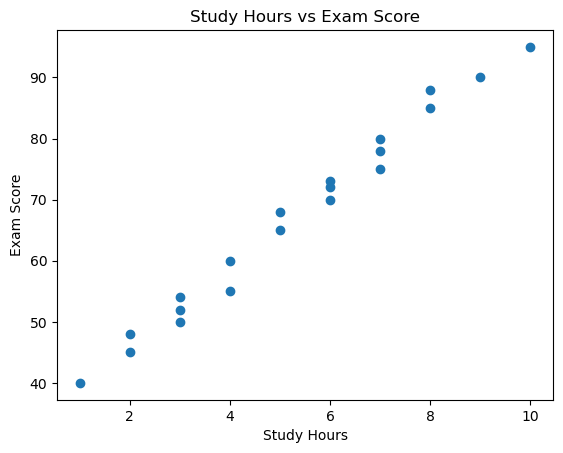

In [13]:
plt.scatter(df["Study_Hours"], df["Exam_Score"])
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()


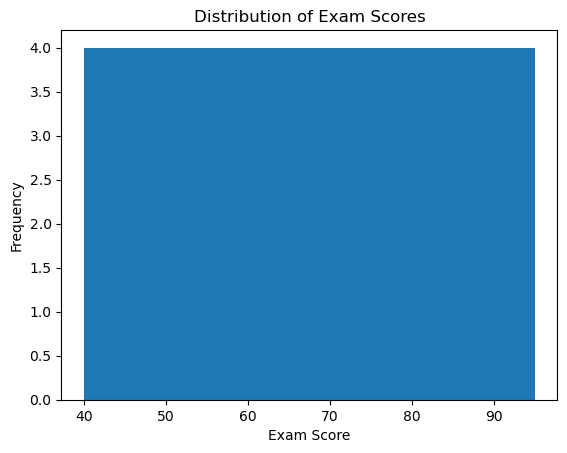

In [15]:
plt.hist(df["Exam_Score"], bins=5)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


In [17]:
X = df[["Study_Hours", "Sleep_Hours", "Attendance"]]
y = df["Exam_Score"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(X_test)


In [25]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)


MAE: 0.9390093654838516
R2 Score: 0.9970604987119472


In [27]:
X2 = df[["Study_Hours", "Attendance"]]

X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y2_pred = model2.predict(X2_test)

print("R2 without Sleep_Hours:", r2_score(y_test, y2_pred))


R2 without Sleep_Hours: 0.9958164269346026


In [29]:
df["Effort"] = df["Study_Hours"] * df["Attendance"]

X3 = df[["Study_Hours", "Sleep_Hours", "Attendance", "Effort"]]

X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=42
)

model3 = LinearRegression()
model3.fit(X3_train, y_train)

y3_pred = model3.predict(X3_test)

print("R2 with Effort Feature:", r2_score(y_test, y3_pred))


R2 with Effort Feature: 0.9968814679809138


In [31]:
model_full = LinearRegression()
model_full.fit(X, y)

y_full_pred = model_full.predict(X)

print("R2 on Full Dataset:", r2_score(y, y_full_pred))


R2 on Full Dataset: 0.9860321830882112
